<a href="https://colab.research.google.com/github/nishant18165/Training-VGG16-Model-of-pytorch-with-custom-layers/blob/main/vgg16_with_custom_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
#import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import models
import torch.utils.data as to

In [ ]:
# check GPU availability

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [ ]:
"""Loading dataset from torch"""
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_dataset, val_dataset = to.random_split(trainset,
                                               [40000, 10000])
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128,
                                          shuffle=True)
val_dataloader=torch.utils.data.DataLoader(val_dataset, batch_size=128,
                                          shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(len(train_dataset))
print(len(val_dataset))
print(len(val_dataloader))
print(len(test_dataloader))


40000
10000
313
313


In [ ]:
"""Loading Model"""
model = models.vgg16(pretrained=True)
#print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
"""Freezing all Layers of pretrained model"""
for param in model.parameters():
  param.requires_grad=False
  

In [ ]:
num_ftrs=model.classifier[6].in_features
print(num_ftrs)

4096


In [ ]:
"""Replacing last dense layer with coustom layers"""
model.classifier[6]=nn.Sequential(nn.Linear(num_ftrs,1024),nn.ReLU(inplace=True),nn.Linear(1024,256),nn.ReLU(inplace=True),nn.Linear(256,64),nn.ReLU(inplace=True),nn.Linear(64,10))
print(model)
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

138,735,370 total parameters.
4,474,826 training parameters.


In [ ]:
# optimizer
optimizer = optim.SGD(model.classifier.parameters(), lr=0.1,momentum=0.9)
# loss function
criterion = nn.CrossEntropyLoss()


In [ ]:
train_loss= []
val_loss= []
for epoch in range(20):
    print(epoch)
    model.train()
    train_running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_running_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_e_loss = train_running_loss/len(train_dataloader)
    model.eval()
    val_running_loss = 0.0
    for i, data in enumerate(val_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        output = model(data)
        loss = criterion(output, target)
        val_running_loss += loss.item()

    val_e_loss = val_running_loss/len(test_dataloader)
    #print(val_e_loss,train_e_loss)
    train_loss.append(train_e_loss)
    val_loss.append(val_e_loss)

In [ ]:
import numpy as np
model.eval()
y_pred=[]
y_test=[]
for i, data in enumerate(test_dataloader):
  data, target = data[0].to(device), data[1].to(device)
  output = model(data)
  _, preds = torch.max(output.data, 1)
  for i in range(len(preds)):
    y_pred.append(preds[i].item())
    y_test.append(target[i].item())
  
 

In [ ]:
print(y_pred)
print(y_test)

[1, 8, 8, 9, 6, 6, 3, 6, 3, 9, 0, 9, 7, 7, 9, 2, 5, 7, 8, 6, 3, 0, 4, 9, 4, 4, 7, 2, 1, 6, 6, 6, 4, 3, 9, 6, 7, 9, 9, 5, 6, 6, 7, 3, 0, 9, 3, 9, 4, 6, 9, 8, 8, 6, 8, 8, 7, 7, 5, 6, 7, 3, 6, 3, 6, 6, 1, 8, 4, 5, 8, 6, 8, 8, 9, 0, 9, 5, 5, 8, 8, 1, 1, 4, 5, 7, 3, 0, 8, 9, 0, 3, 8, 6, 4, 6, 6, 2, 0, 7, 7, 7, 5, 3, 9, 1, 3, 6, 8, 7, 4, 0, 2, 2, 1, 3, 0, 1, 6, 5, 8, 3, 1, 2, 8, 2, 8, 3, 8, 0, 6, 1, 8, 9, 1, 2, 9, 7, 4, 8, 4, 5, 6, 3, 8, 8, 6, 6, 3, 7, 8, 6, 6, 9, 0, 6, 5, 9, 3, 4, 0, 1, 3, 4, 0, 4, 8, 4, 5, 4, 1, 7, 8, 8, 9, 9, 6, 7, 3, 8, 0, 5, 0, 4, 0, 8, 6, 3, 2, 0, 6, 1, 7, 8, 6, 2, 8, 0, 7, 8, 5, 8, 8, 9, 1, 3, 8, 2, 7, 9, 5, 7, 5, 9, 8, 0, 7, 9, 8, 2, 7, 3, 9, 4, 3, 9, 8, 2, 3, 4, 5, 1, 5, 8, 8, 0, 4, 9, 5, 5, 1, 3, 8, 9, 0, 3, 8, 9, 6, 6, 5, 3, 9, 1, 4, 8, 3, 0, 8, 9, 8, 9, 2, 3, 0, 8, 6, 4, 7, 0, 3, 7, 6, 3, 8, 3, 0, 6, 4, 7, 1, 0, 6, 1, 0, 9, 8, 8, 7, 9, 3, 0, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 7, 2, 6, 8, 8, 4, 9, 2, 8, 6, 8, 0, 4, 6, 4, 7, 6, 5, 3, 5, 7, 3, 6, 1, 7, 5, 4, 6, 1, 8, 5, 

In [ ]:
"""Function to calculate accuracy,F1 score and confusion matrix"""
def metrics(actual,predicted):
    actual=np.array(actual)
    predicted=np.array(predicted)
    total_data=len(actual)
    len_class= len(np.unique(actual))
    cm= np.zeros((len_class,len_class),int) #confusion matrix
    #print(cm.shape)
    for i in range(total_data):
      #print(actual[i],predicted[i])
      #print(cm[actual[i]][predicted[i]])
      cm[actual[i]][predicted[i]]=cm[actual[i]][predicted[i]]+1

    # Accuracy
    Accuracy=np.trace(np.array(cm))/total_data
    print("Accuracy : \n", Accuracy)
    print("Confusion Matrix : \n", cm)

metrics(y_test,y_pred)

Accuracy : 
 0.6308
Confusion Matrix : 
 [[647  32  26  18  40   5  12  12 164  44]
 [ 19 702   5  23   1   7   8  16  98 121]
 [ 95  18 415  60 142  47 153  40  28   2]
 [ 16  40  38 475  65 130 120  71  24  21]
 [ 24  13  54  33 586  24 127 103  24  12]
 [  9  21  35 154  45 534  74  90  16  22]
 [  8  13  36  53  60  29 777  10  12   2]
 [ 23  27  36  31 104  44  19 666  17  33]
 [ 48  53   5  14  13   2   3  10 809  43]
 [ 21 125   2  15   6  12   4  18 100 697]]


In [ ]:
for i in range(10):
  y_test_temp=[]
  y_pred_temp=[]
  for j in range(len(y_test)):
    if(y_test[j]==i):
      y_test_temp.append(1)
    else:
      y_test_temp.append(0)
    if(y_pred[j]==i):
      y_pred_temp.append(1)
    else:
      y_pred_temp.append(0)
  metrics(y_test_temp,y_pred_temp)

Accuracy : 
 0.9384
Confusion Matrix : 
 [[8737  263]
 [ 353  647]]
Accuracy : 
 0.936
Confusion Matrix : 
 [[8658  342]
 [ 298  702]]
Accuracy : 
 0.9178
Confusion Matrix : 
 [[8763  237]
 [ 585  415]]
Accuracy : 
 0.9074
Confusion Matrix : 
 [[8599  401]
 [ 525  475]]
Accuracy : 
 0.911
Confusion Matrix : 
 [[8524  476]
 [ 414  586]]
Accuracy : 
 0.9234
Confusion Matrix : 
 [[8700  300]
 [ 466  534]]
Accuracy : 
 0.9257
Confusion Matrix : 
 [[8480  520]
 [ 223  777]]
Accuracy : 
 0.9296
Confusion Matrix : 
 [[8630  370]
 [ 334  666]]
Accuracy : 
 0.9326
Confusion Matrix : 
 [[8517  483]
 [ 191  809]]
Accuracy : 
 0.9397
Confusion Matrix : 
 [[8700  300]
 [ 303  697]]


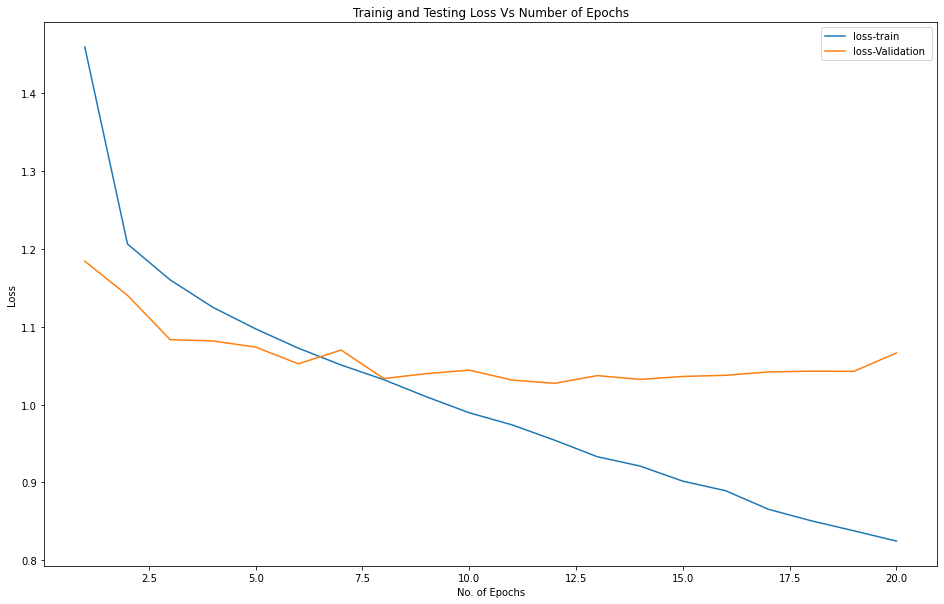

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16,10))
plt.plot(np.arange(1,21),train_loss,label='loss-train ')
plt.plot(np.arange(1,21),val_loss,label='loss-Validation ') 
plt.xlabel("No. of Epochs") 
plt.ylabel("Loss")
plt.title('Trainig and Testing Loss Vs Number of Epochs')
plt.legend()
plt.show()